# Baseline 
Baseline solution for VarDial 2022 shared task on Italian Dialect Classification. 

In [1]:
# load the dataset
import pandas as pd
data = pd.read_csv("dataset/data.csv", ) 

In [2]:
data.head()

,id,url,title,text,label,clean
0,32636.0,https://eml.wikipedia.org/wiki?curid=32636,.iveco,'l è 'l nòm 'd un domìni genèric. Al funsiòun...,0.0,'l è 'l nòm 'd un domìni genèric. Al funsiòun...
1,32637.0,https://eml.wikipedia.org/wiki?curid=32637,.case,'l è 'l nòm 'd un domìni genèric. Al funsiòun...,0.0,'l è 'l nòm 'd un domìni genèric. Al funsiòun...
2,32638.0,https://eml.wikipedia.org/wiki?curid=32638,.caseih,'l è 'l nòm 'd un domìni genèric. Al funsiòun...,0.0,'l è 'l nòm 'd un domìni genèric. Al funsiòun...
3,32639.0,https://eml.wikipedia.org/wiki?curid=32639,.baseball,'l è 'l nòm 'd un domìni genèric. Al funsiòun...,0.0,'l è 'l nòm 'd un domìni genèric. Al funsiòun...
4,32640.0,https://eml.wikipedia.org/wiki?curid=32640,.newholland,'l è 'l nòm 'd un domìni genèric. Al funsiòun...,0.0,'l è 'l nòm 'd un domìni genèric. Al funsiòun...


In [3]:
X = data['clean'].values
y = data['label'].values.astype(int)
print(X.shape, y.shape)

(264972,) (264972,)


Vectorize and scale the training data.

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

vectorizer = TfidfVectorizer(analyzer='char_wb', ngram_range=(3,5), max_features=100000)
scaler = StandardScaler(with_mean=False)
X = vectorizer.fit_transform(X)
X = scaler.fit_transform(X)

In [5]:
X.shape

(264972, 100000)

Cross-validation k-fold cross validation initialization.

In [6]:
from sklearn.model_selection import RepeatedKFold

rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

Train a naive Bayes classifier with the extracted features.

In [7]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

model = SGDClassifier(max_iter=7000)
scores = cross_val_score(model, X, y, scoring='f1_micro', cv=rkf, n_jobs=-1)
print(f'Repeated cross-validation scores: {np.mean(scores)} ({np.std(scores)})')

Repeated cross-validation scores: 0.9966398961054583 (0.00016166964251535632)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

emiliano


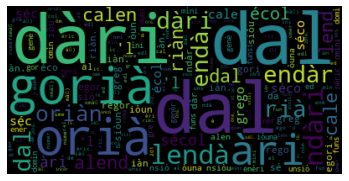

napoletano


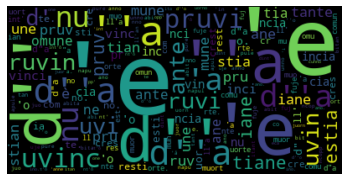

piemontese


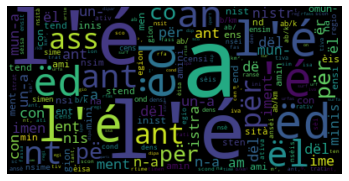

friulano


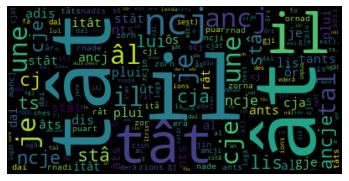

ladino


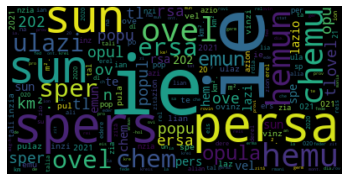

ligure


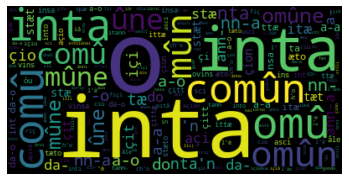

lombardo


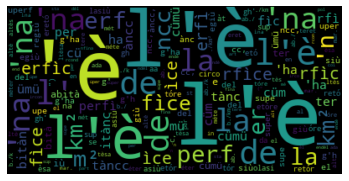

tarantino


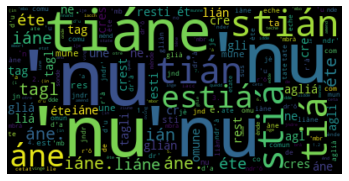

siciliano


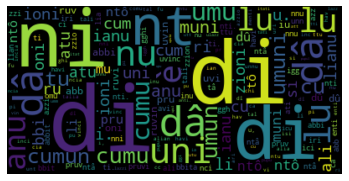

veneto


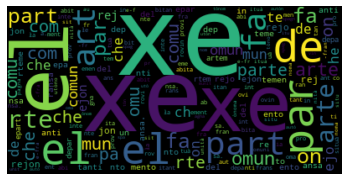

sardo


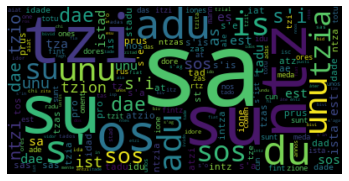

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from utils import explain_label

vocab = vectorizer.get_feature_names_out()

for label in data['label'].unique():
    slicer = y_train == label
    f = X_train[slicer]
    total_freqs = list(np.array(f.sum(axis=0))[0])
    fdict = dict(zip(vocab,total_freqs))
    # generate word cloud of words with highest counts
    wordcloud = WordCloud().generate_from_frequencies(fdict) 
    print(explain_label(label=label))
    plt.clf()
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.show()